# Trabajo Práctico de Big Data

El objetivo de este trabajo práctico es utilizar técnicas de web scraping para obtener comentarios de películas de un sitio web, realizar el procesamiento de texto y analizar el sentimiento de los comentarios utilizando técnicas de análisis de texto. Además, se requiere la visualización de los resultados mediante gráficos para obtener una representación clara de los datos.

# ¿Cual es la mejor pelicula de SpiderMan segun el sentimiento de sus reviews?

## Librerias a utilizar

In [1]:
# Commented out IPython magic to ensure Python compatibility.
#importamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from bs4 import BeautifulSoup
import requests
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')
from textblob import TextBlob


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Web Scrapping

In [2]:
urls = ['https://www.imdb.com/title/tt4633694/reviews?ref_=tt_urv','https://www.imdb.com/title/tt9362722/reviews?ref_=tt_urv','https://www.imdb.com/title/tt6320628/reviews?ref_=tt_urv','https://www.imdb.com/title/tt10872600/reviews?ref_=tt_urv','https://www.imdb.com/title/tt2250912/reviews?ref_=tt_urv','https://www.imdb.com/title/tt0145487/reviews?ref_=tt_urv','https://www.imdb.com/title/tt0316654/reviews?ref_=tt_urv','https://www.imdb.com/title/tt0413300/reviews?ref_=tt_urv']
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
titles = []
contents = []
dates = []
title = ''

max_pages = 40
for url in urls:
    url = f"{url}?start={(10)}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    title = soup.find("div", class_="parent").text.strip()
    title = title.split(' \n')[0]
    title
    for page in range(1, max_pages + 1):
        url = f"{url}?start={((page - 1) * 10)}"


        reviews = soup.find_all("div", class_="lister-item-content")

        for review in reviews:
            titles.append(title)

            content = review.find("div", class_="text").text.strip()
            contents.append(content)

            date_element = review.find("span", class_="review-date")
            date_match = re.search(r'\d+\s\w+\s\d+', date_element.text.strip())
            date = date_match.group() if date_match else "N/A"
            dates.append(date)

data = {
    "Titulo": titles,
    "Reseña": contents,
    "Tiempo": dates
}

reviews = pd.DataFrame(data)




In [25]:
reviews_ = reviews

In [26]:
reviews_

,Titulo,Reseña,Tiempo,Resenas limpias,Polarity,Analysis,Mes
0,Spider-Man: Into the Spider-Verse,"""Spider-Man: Into the Spider-Verse"" is a fanta...",2019-03-26,might beyond might like like screen,0.00,Neutral,March
1,Spider-Man: Into the Spider-Verse,"So many have commented, so I will be brief. Fr...",2019-11-19,must toward faith,0.00,Neutral,November
2,Spider-Man: Into the Spider-Verse,The worlds of superhero movies and superhero c...,2018-12-21,one one could another two must beyond enough,0.00,Neutral,December
3,Spider-Man: Into the Spider-Verse,A movie worthy of Stan Lee's approval. Incredi...,2018-12-17,style,0.00,Neutral,December
4,Spider-Man: Into the Spider-Verse,The thing I hate about superhero movies is the...,2018-12-26,another like one within one one one may must...,0.00,Neutral,December
...,...,...,...,...,...,...,...
7995,Spider-Man 3,I saw the midnight showing and was blown away ...,2007-05-05,plus either within since three two still,0.00,Neutral,May
7996,Spider-Man 3,I remember watching the film some 11 years ago...,2018-04-29,like every every one one Another one one mus...,0.00,Neutral,April
7997,Spider-Man 3,This Spidey Trilogy is actually the only movie...,2007-05-08,around may mind behind say,-0.40,Negative,May
7998,Spider-Man 3,"Easily the worst of the original trilogy, Spid...",2022-01-04,two could either three though two enjoyable,0.50,Positive,January


## Procesamiento y Limpieza de Texto

In [5]:
wordnet_lemmatizer = WordNetLemmatizer()
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
# Define a function to clean the text
def clean(text):

    pos_data = []
    lemma_rew = " "

    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)

    tags = pos_tag(word_tokenize(text))


    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            pos_data.append(tuple([word, pos_dict.get(tag[0])]))


    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            text = lemma_rew + " " + lemma
    return text


# Cleaning the text in the review column
reviews_['Resenas limpias'] = reviews_['Reseña'].apply(clean)


## Analisis de Sentimiento

In [6]:

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

reviews_['Polarity'] = reviews['Resenas limpias'].apply(getPolarity)
reviews['Analysis'] = reviews['Polarity'].apply(analysis)
reviews_

,Titulo,Reseña,Tiempo,Resenas limpias,Polarity,Analysis
0,Spider-Man: Into the Spider-Verse,"""Spider-Man: Into the Spider-Verse"" is a fanta...",26 March 2019,might beyond might like like screen,0.00,Neutral
1,Spider-Man: Into the Spider-Verse,"So many have commented, so I will be brief. Fr...",19 November 2019,must toward faith,0.00,Neutral
2,Spider-Man: Into the Spider-Verse,The worlds of superhero movies and superhero c...,21 December 2018,one one could another two must beyond enough,0.00,Neutral
3,Spider-Man: Into the Spider-Verse,A movie worthy of Stan Lee's approval. Incredi...,17 December 2018,style,0.00,Neutral
4,Spider-Man: Into the Spider-Verse,The thing I hate about superhero movies is the...,26 December 2018,another like one within one one one may must...,0.00,Neutral
...,...,...,...,...,...,...
7995,Spider-Man 3,I saw the midnight showing and was blown away ...,5 May 2007,plus either within since three two still,0.00,Neutral
7996,Spider-Man 3,I remember watching the film some 11 years ago...,29 April 2018,like every every one one Another one one mus...,0.00,Neutral
7997,Spider-Man 3,This Spidey Trilogy is actually the only movie...,8 May 2007,around may mind behind say,-0.40,Negative
7998,Spider-Man 3,"Easily the worst of the original trilogy, Spid...",4 January 2022,two could either three though two enjoyable,0.50,Positive


In [7]:
analysis = reviews_.groupby(['Titulo'])['Analysis'].value_counts()

In [8]:
analysis = analysis.to_dict()

In [9]:
analysis

{('Spider-Man', 'Neutral'): 680,
 ('Spider-Man', 'Positive'): 200,
 ('Spider-Man', 'Negative'): 120,
 ('Spider-Man 2', 'Neutral'): 680,
 ('Spider-Man 2', 'Positive'): 200,
 ('Spider-Man 2', 'Negative'): 120,
 ('Spider-Man 3', 'Neutral'): 800,
 ('Spider-Man 3', 'Positive'): 120,
 ('Spider-Man 3', 'Negative'): 80,
 ('Spider-Man: Across the Spider-Verse', 'Neutral'): 600,
 ('Spider-Man: Across the Spider-Verse', 'Negative'): 240,
 ('Spider-Man: Across the Spider-Verse', 'Positive'): 160,
 ('Spider-Man: Far from Home', 'Neutral'): 840,
 ('Spider-Man: Far from Home', 'Positive'): 120,
 ('Spider-Man: Far from Home', 'Negative'): 40,
 ('Spider-Man: Homecoming', 'Neutral'): 760,
 ('Spider-Man: Homecoming', 'Positive'): 160,
 ('Spider-Man: Homecoming', 'Negative'): 80,
 ('Spider-Man: Into the Spider-Verse', 'Neutral'): 720,
 ('Spider-Man: Into the Spider-Verse', 'Positive'): 200,
 ('Spider-Man: Into the Spider-Verse', 'Negative'): 80,
 ('Spider-Man: No Way Home', 'Neutral'): 680,
 ('Spider-Man:

## Visualizacion de Datos

In [10]:
import pandas as pd


# Crear listas para las columnas y los índices del DataFrame
peliculas = []
sentimientos = []
cantidades = []

# Extraer los datos del diccionario
for (pelicula, sentimiento), cantidad in analysis.items():
    peliculas.append(pelicula)
    sentimientos.append(sentimiento)
    cantidades.append(cantidad)

# Crear un diccionario para almacenar los datos en el nuevo formato
datos_nuevo = {"Pelicula": peliculas, "Sentimiento": sentimientos, "Cantidad": cantidades}

# Crear el DataFrame
df = pd.DataFrame(datos_nuevo)

# Utilizar pivot para reorganizar los datos en el formato deseado
df_pivot = df.pivot(index="Sentimiento", columns="Pelicula", values="Cantidad")


# Imprimir el DataFrame pivot
df_sentimientos = pd.DataFrame(df_pivot.T)

In [28]:
reviews__ = reviews_

In [40]:
reviews_ = reviews__

In [27]:
reviews_

,Titulo,Reseña,Tiempo,Resenas limpias,Polarity,Analysis,Mes
0,Spider-Man: Into the Spider-Verse,"""Spider-Man: Into the Spider-Verse"" is a fanta...",2019-03-26,might beyond might like like screen,0.00,Neutral,March
1,Spider-Man: Into the Spider-Verse,"So many have commented, so I will be brief. Fr...",2019-11-19,must toward faith,0.00,Neutral,November
2,Spider-Man: Into the Spider-Verse,The worlds of superhero movies and superhero c...,2018-12-21,one one could another two must beyond enough,0.00,Neutral,December
3,Spider-Man: Into the Spider-Verse,A movie worthy of Stan Lee's approval. Incredi...,2018-12-17,style,0.00,Neutral,December
4,Spider-Man: Into the Spider-Verse,The thing I hate about superhero movies is the...,2018-12-26,another like one within one one one may must...,0.00,Neutral,December
...,...,...,...,...,...,...,...
7995,Spider-Man 3,I saw the midnight showing and was blown away ...,2007-05-05,plus either within since three two still,0.00,Neutral,May
7996,Spider-Man 3,I remember watching the film some 11 years ago...,2018-04-29,like every every one one Another one one mus...,0.00,Neutral,April
7997,Spider-Man 3,This Spidey Trilogy is actually the only movie...,2007-05-08,around may mind behind say,-0.40,Negative,May
7998,Spider-Man 3,"Easily the worst of the original trilogy, Spid...",2022-01-04,two could either three though two enjoyable,0.50,Positive,January


In [12]:
df_sentimientos

Sentimiento,Negative,Neutral,Positive
Pelicula,,,
Spider-Man,120,680,200
Spider-Man 2,120,680,200
Spider-Man 3,80,800,120
Spider-Man: Across the Spider-Verse,240,600,160
Spider-Man: Far from Home,40,840,120
Spider-Man: Homecoming,80,760,160
Spider-Man: Into the Spider-Verse,80,720,200
Spider-Man: No Way Home,80,680,240


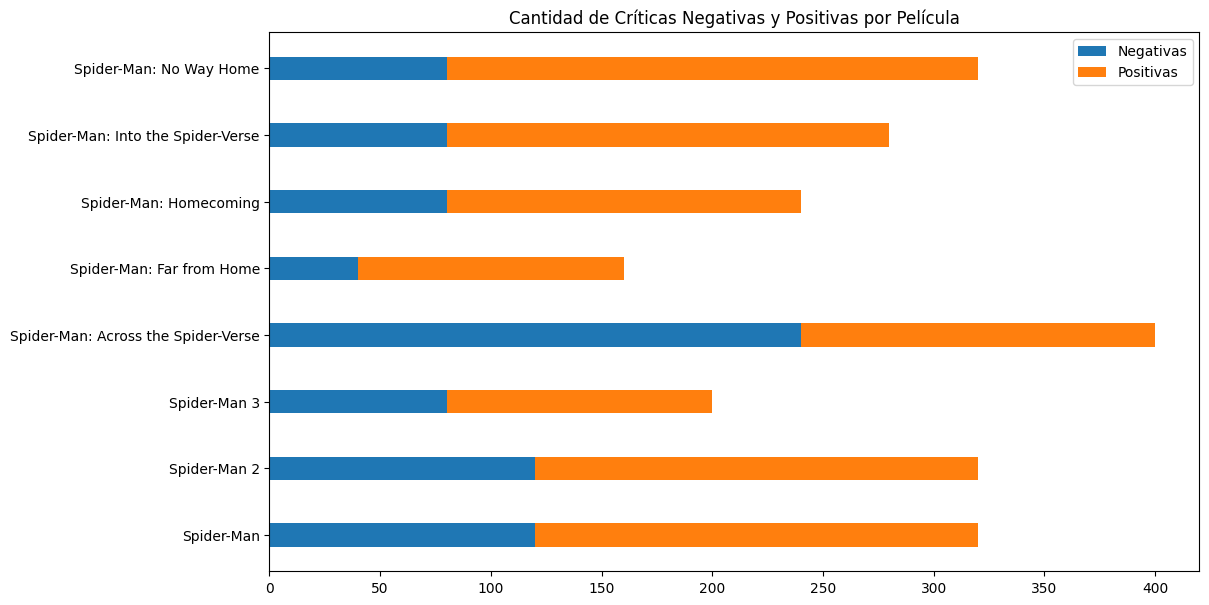

In [13]:

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize = (12,7))

# Obtener los datos de las películas y sentimientos
peliculas = df_sentimientos.columns
sentimientos = df_sentimientos.index

# Obtener las cantidades de críticas negativas y positivas
cantidades_negativas = df_sentimientos.loc[:, "Negative"]
cantidades_positivas = df_sentimientos.loc[:, "Positive"]

# Establecer el ancho de las barras
ancho_barras = 0.35

# Crear las barras para las críticas negativas
ax.barh(sentimientos, cantidades_negativas, ancho_barras, label="Negativas")

# Crear las barras para las críticas positivas
ax.barh(sentimientos, cantidades_positivas, ancho_barras, left=cantidades_negativas, label="Positivas")

# Configurar el gráfico
ax.set_title("Cantidad de Críticas Negativas y Positivas por Película")
ax.legend()

# Mostrar el gráfico
plt.show()

In [14]:
reviews_['Titulo'].drop_duplicates()

0         Spider-Man: Into the Spider-Verse
1000    Spider-Man: Across the Spider-Verse
2000              Spider-Man: Far from Home
3000                Spider-Man: No Way Home
4000                 Spider-Man: Homecoming
5000                             Spider-Man
6000                           Spider-Man 2
7000                           Spider-Man 3
Name: Titulo, dtype: object

In [20]:
sentimiento_mes

Mes
January     0.077273
February    0.194444
March       0.037500
April       0.000000
May         0.011232
June        0.032944
Name: Polarity, dtype: float64

In [33]:
reviews_

,Titulo,Reseña,Tiempo,Resenas limpias,Polarity,Analysis,Mes,Anho


In [35]:
reviews_

,Titulo,Reseña,Tiempo,Resenas limpias,Polarity,Analysis,Mes,Anho
0,Spider-Man: Into the Spider-Verse,"""Spider-Man: Into the Spider-Verse"" is a fanta...",2019-03-26,might beyond might like like screen,0.00,Neutral,March,2019
1,Spider-Man: Into the Spider-Verse,"So many have commented, so I will be brief. Fr...",2019-11-19,must toward faith,0.00,Neutral,November,2019
2,Spider-Man: Into the Spider-Verse,The worlds of superhero movies and superhero c...,2018-12-21,one one could another two must beyond enough,0.00,Neutral,December,2018
3,Spider-Man: Into the Spider-Verse,A movie worthy of Stan Lee's approval. Incredi...,2018-12-17,style,0.00,Neutral,December,2018
4,Spider-Man: Into the Spider-Verse,The thing I hate about superhero movies is the...,2018-12-26,another like one within one one one may must...,0.00,Neutral,December,2018
...,...,...,...,...,...,...,...,...
7995,Spider-Man 3,I saw the midnight showing and was blown away ...,2007-05-05,plus either within since three two still,0.00,Neutral,May,2007
7996,Spider-Man 3,I remember watching the film some 11 years ago...,2018-04-29,like every every one one Another one one mus...,0.00,Neutral,April,2018
7997,Spider-Man 3,This Spidey Trilogy is actually the only movie...,2007-05-08,around may mind behind say,-0.40,Negative,May,2007
7998,Spider-Man 3,"Easily the worst of the original trilogy, Spid...",2022-01-04,two could either three though two enjoyable,0.50,Positive,January,2022


In [44]:
reviews_

,Titulo,Reseña,Tiempo,Resenas limpias,Polarity,Analysis,Mes,Anho
0,Spider-Man: Into the Spider-Verse,"""Spider-Man: Into the Spider-Verse"" is a fanta...",2019-03-26,might beyond might like like screen,0.00,Neutral,March,2019
1,Spider-Man: Into the Spider-Verse,"So many have commented, so I will be brief. Fr...",2019-11-19,must toward faith,0.00,Neutral,November,2019
2,Spider-Man: Into the Spider-Verse,The worlds of superhero movies and superhero c...,2018-12-21,one one could another two must beyond enough,0.00,Neutral,December,2018
3,Spider-Man: Into the Spider-Verse,A movie worthy of Stan Lee's approval. Incredi...,2018-12-17,style,0.00,Neutral,December,2018
4,Spider-Man: Into the Spider-Verse,The thing I hate about superhero movies is the...,2018-12-26,another like one within one one one may must...,0.00,Neutral,December,2018
...,...,...,...,...,...,...,...,...
7995,Spider-Man 3,I saw the midnight showing and was blown away ...,2007-05-05,plus either within since three two still,0.00,Neutral,May,2007
7996,Spider-Man 3,I remember watching the film some 11 years ago...,2018-04-29,like every every one one Another one one mus...,0.00,Neutral,April,2018
7997,Spider-Man 3,This Spidey Trilogy is actually the only movie...,2007-05-08,around may mind behind say,-0.40,Negative,May,2007
7998,Spider-Man 3,"Easily the worst of the original trilogy, Spid...",2022-01-04,two could either three though two enjoyable,0.50,Positive,January,2022


In [ ]:
reviews_['Tiempo'] = pd.to_datetime(reviews_['Tiempo'])
reviews_['Mes'] = reviews_['Tiempo'].dt.strftime('%B')  # Agrega una nueva columna 'Mes' con el nombre del mes
reviews_['Anho'] = pd.to_datetime(reviews_['Tiempo']).dt.strftime('%Y')


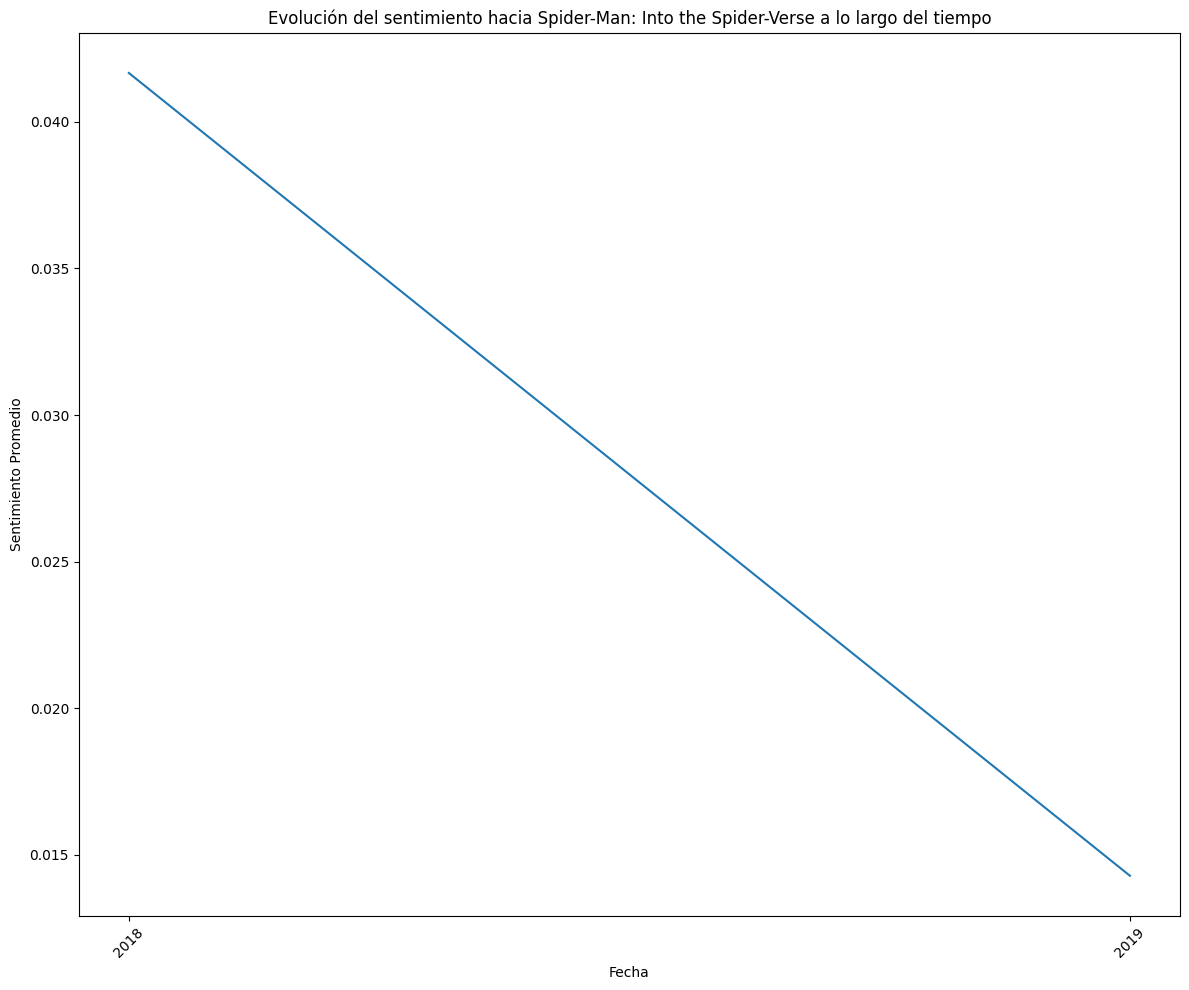

None


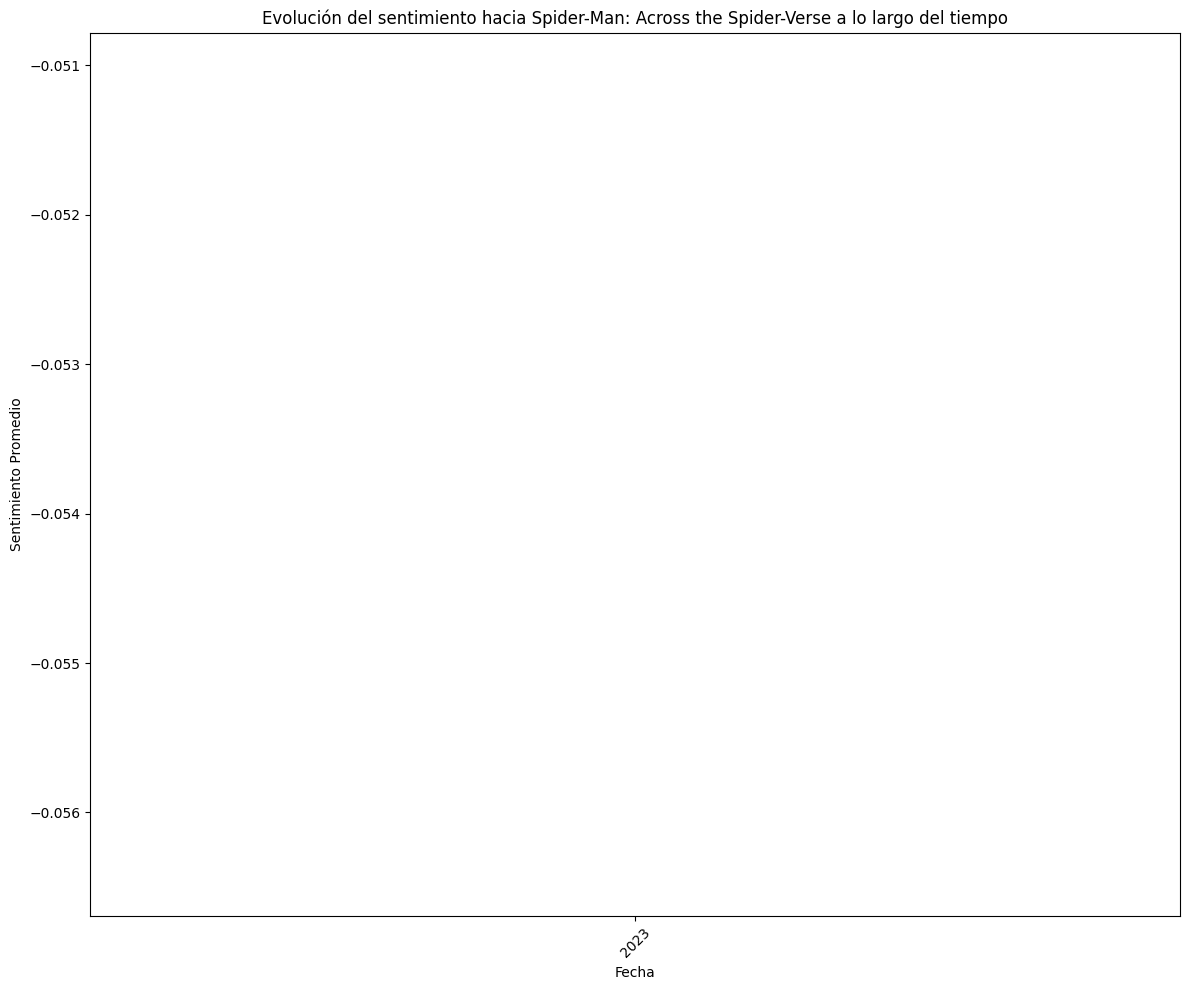

None


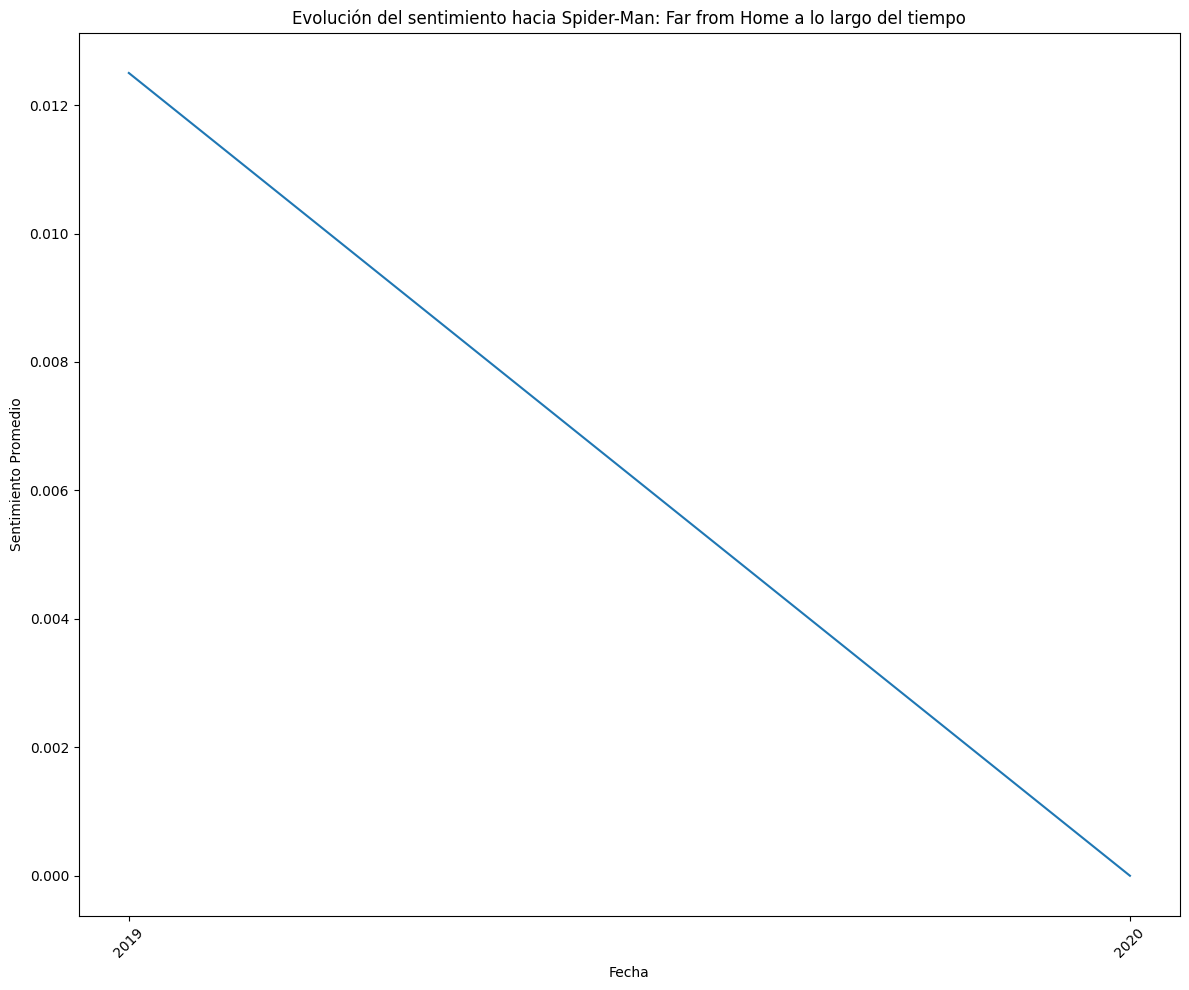

None


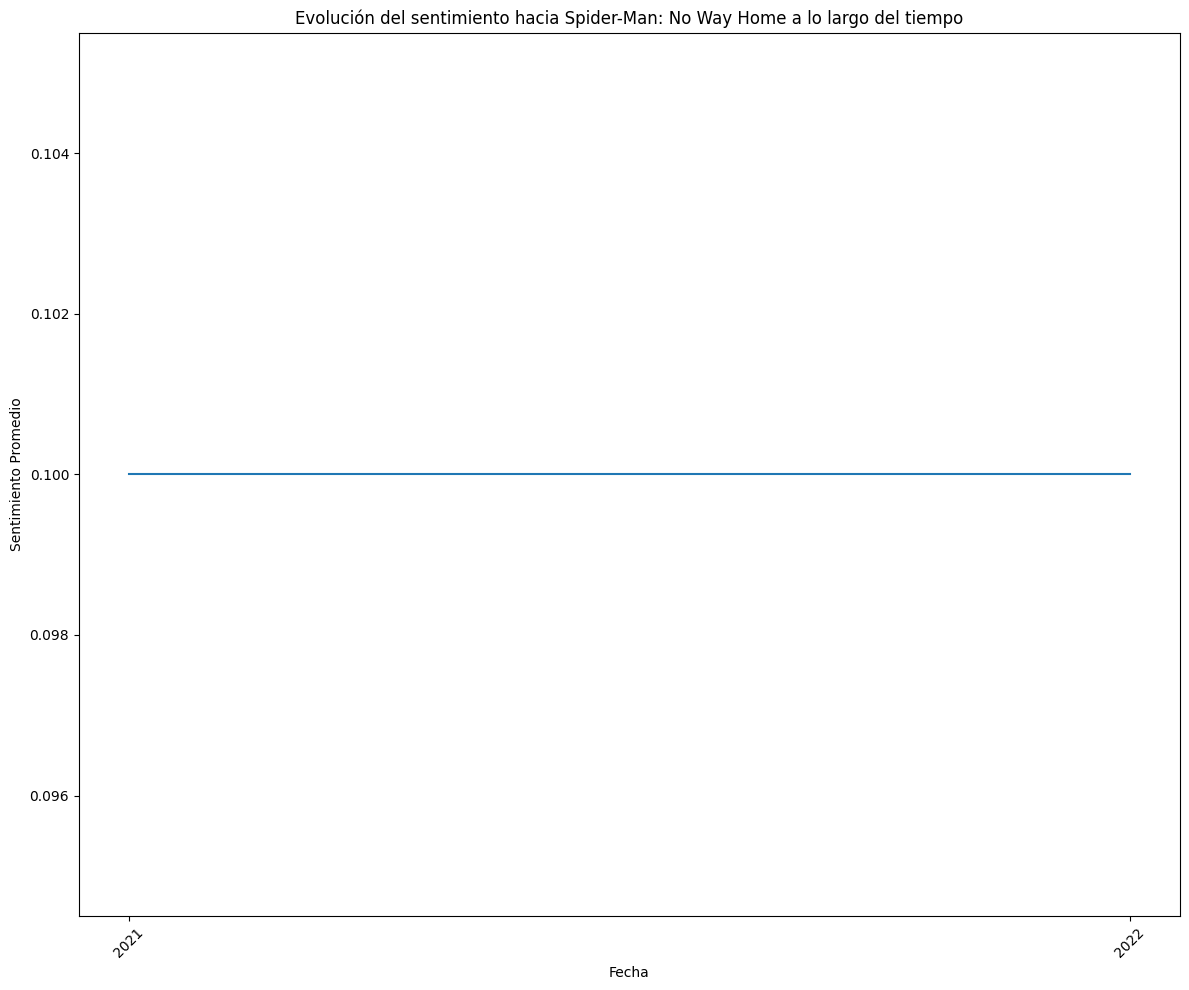

None


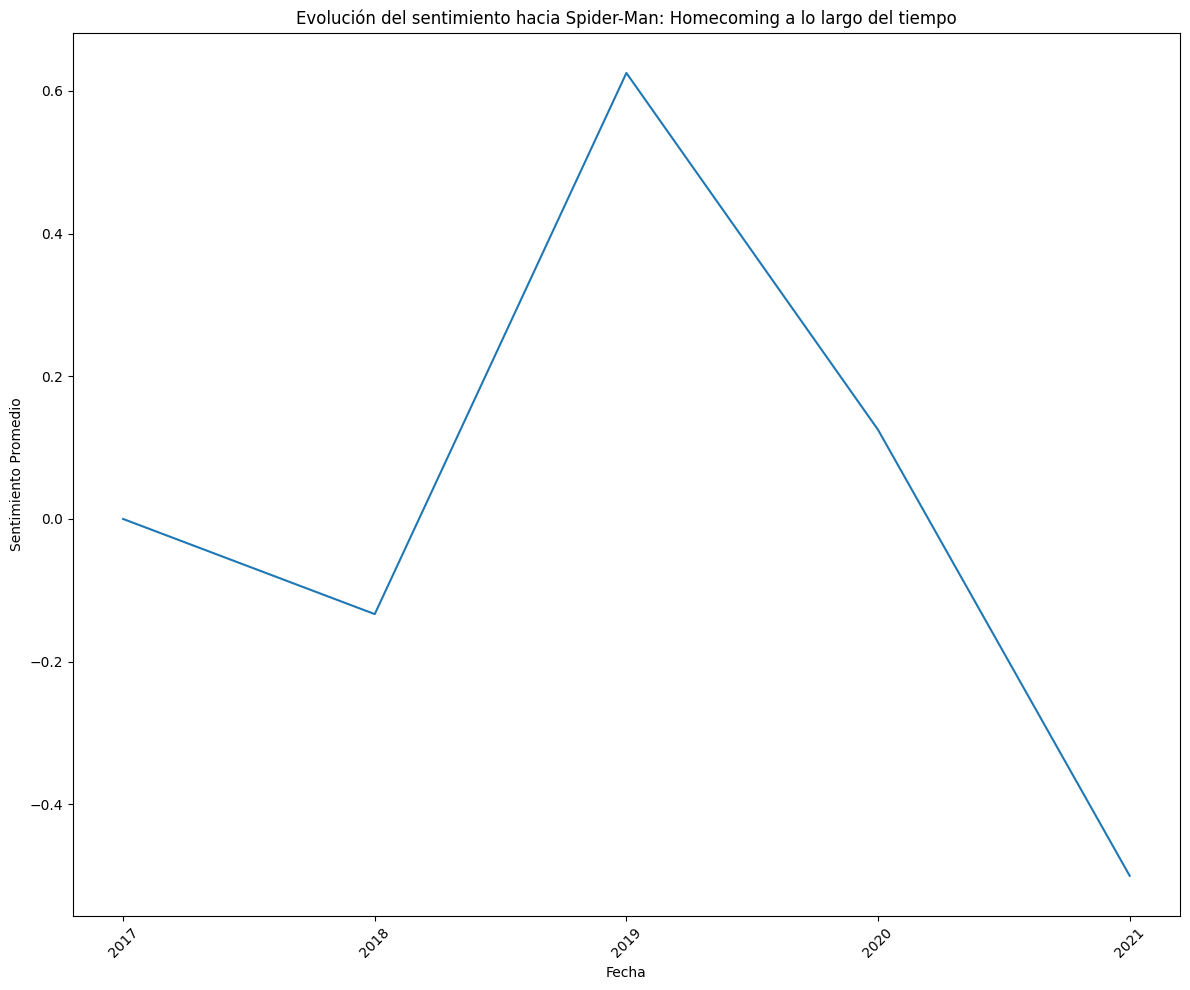

None


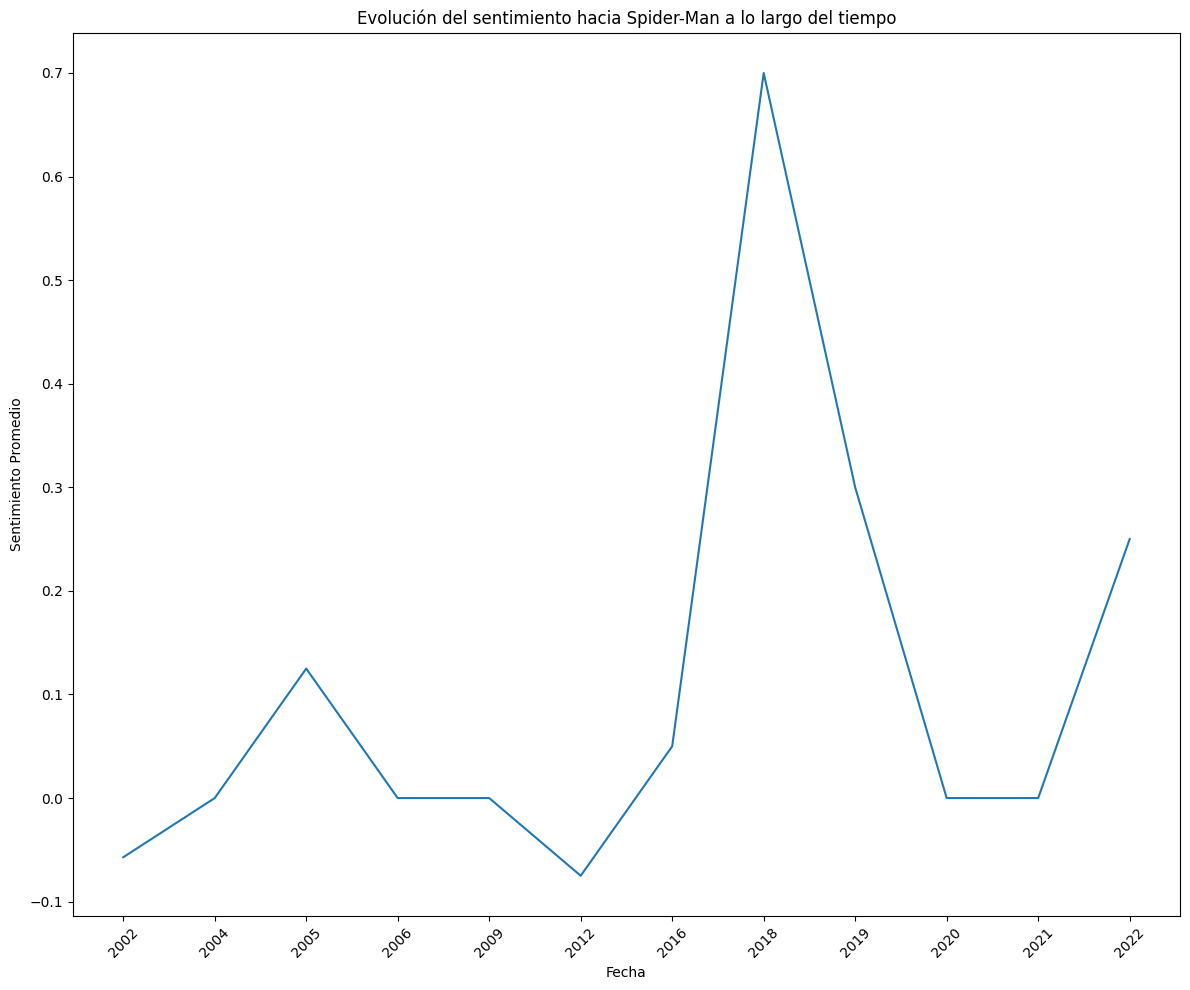

None


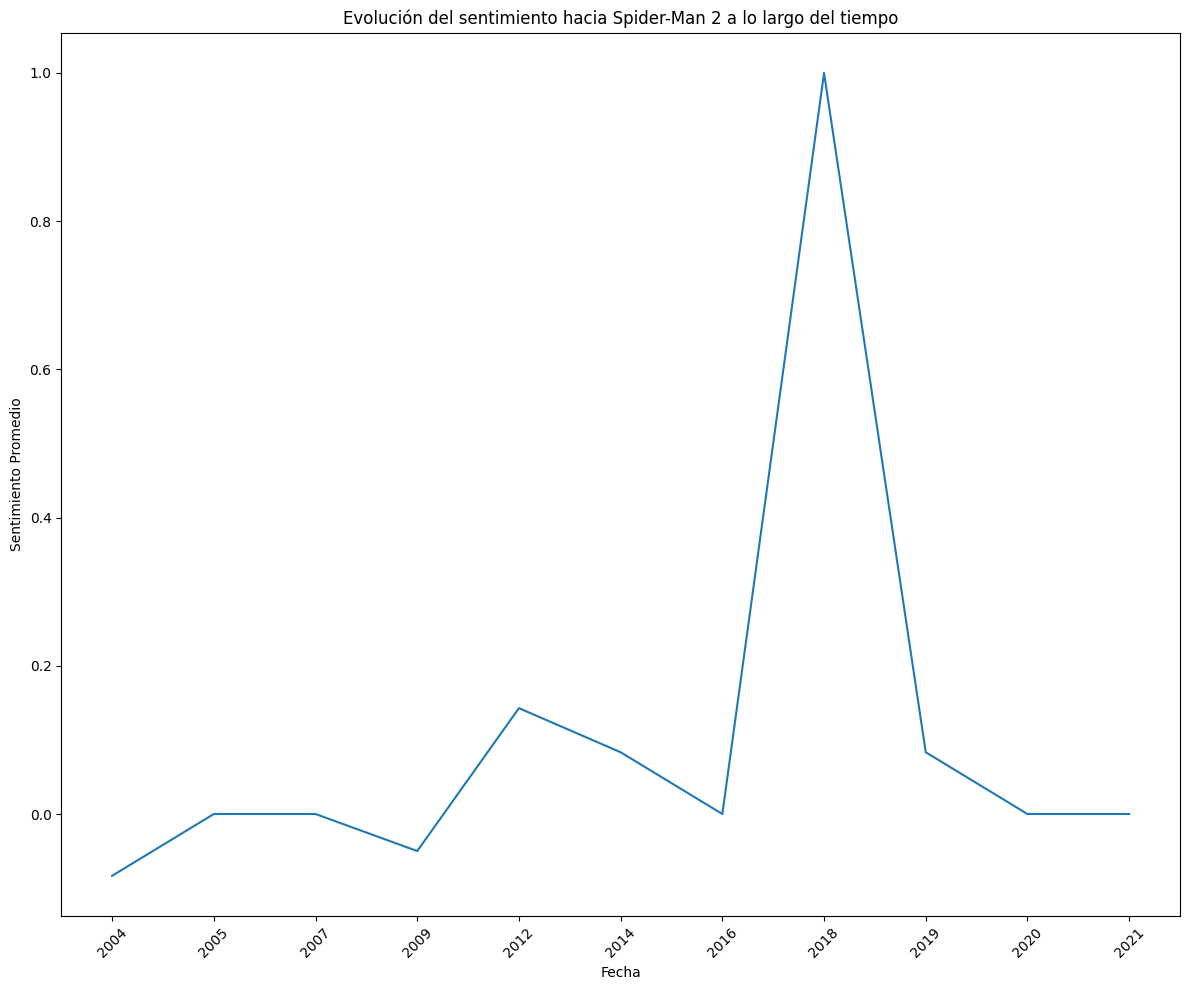

None


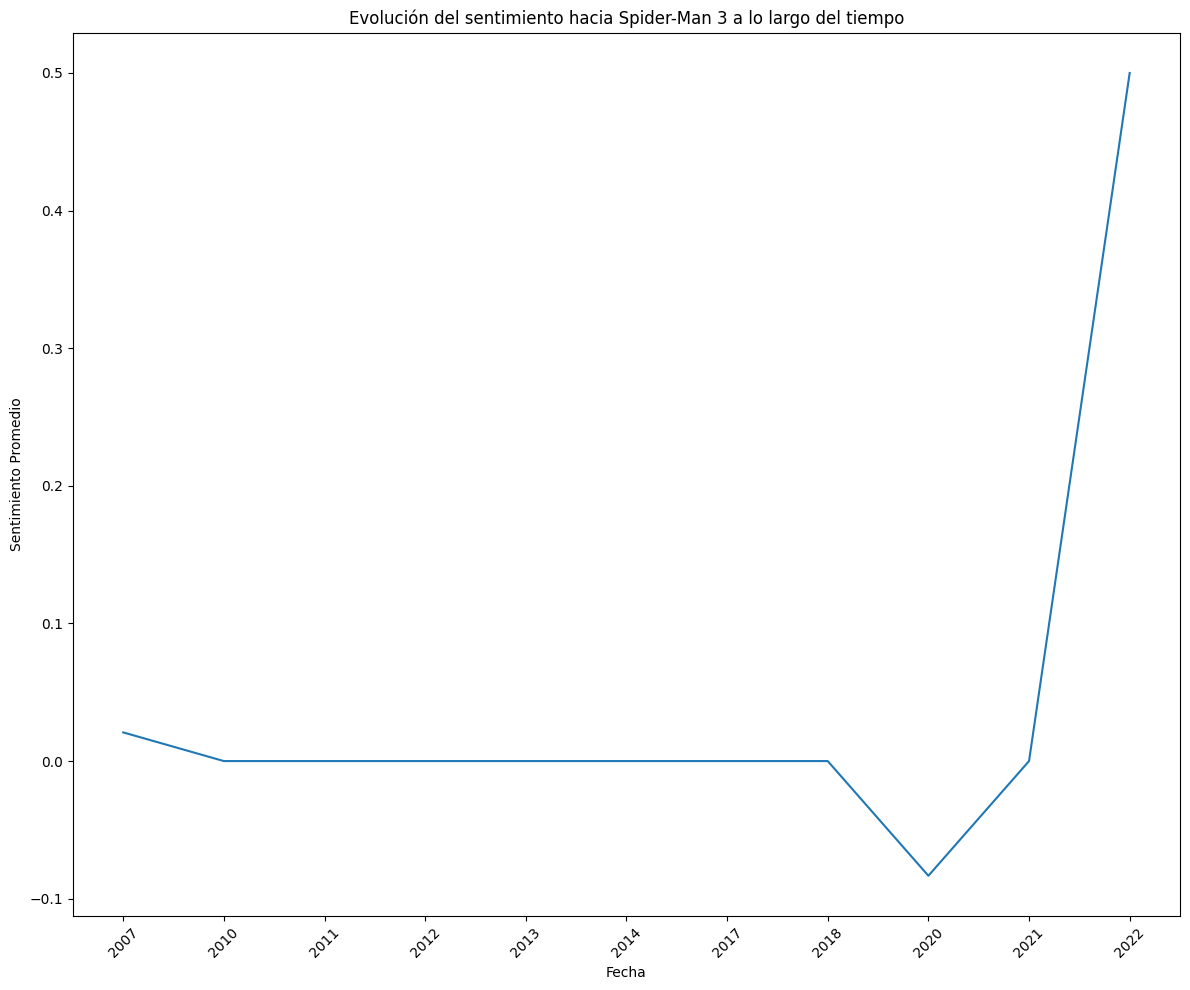

None


In [46]:
# Establecer el orden de los meses
for i in reviews_['Titulo'].drop_duplicates():
    reviews___ = reviews_.loc[reviews_['Titulo'].isin([i])]
    reviews_months = reviews___.groupby('Anho')['Polarity'].mean()
    plt.figure(figsize=(12, 10))
    plt.plot(reviews_months.index, reviews_months.values)
    plt.xlabel('Fecha')
    plt.ylabel('Sentimiento Promedio')
    plt.title(f'Evolución del sentimiento hacia {i} a lo largo del tiempo')
    plt.xticks(rotation=45)
    plt.tight_layout()
    print(plt.show())

## Conclusiones

Realice conclusiones y análisis sobre los resultados obtenidos.

● ¿Cuál es la tendencia general de sentimiento en los comentarios de las películas?
Realmente no existe una tendencia en ninguna de las reviews, unicamente en Across The Spiderverse, lo cual puede deberse a que es una pelicula nueva que se ha estrenado a menos de un mes.

● ¿Existen diferencias en el sentimiento entre géneros de películas o directores específicos?
Al todas tratarse de peliculas de superheroes y sobre el mismo superheroe, no hay una gran diferencia entre ellas, la mayor diferencias pueden encontrarse al comparar las animadas contra las Live Actions.